In [13]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
from tensorflow.keras.applications import (DenseNet201, InceptionV3, MobileNetV2,
                                           ResNet101, Xception, EfficientNetB7,
                                           VGG19, NASNetLarge)
from tensorflow.keras.applications import (densenet, inception_v3, mobilenet_v2, 
                                           resnet, xception, efficientnet, 
                                           vgg19, nasnet)
from tensorflow.keras.callbacks import (ModelCheckpoint, TensorBoard, EarlyStopping, 
                                        LearningRateScheduler)

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential,Model
from tensorflow.keras import backend as K
import tf_explain as tfe
import tensorflow as tf

print("All packages loaded.")


All packages loaded.


In [27]:
#Show dataset labels sorted.

from os import listdir
from natsort import natsorted
path = 'C:/Users/Nicko/Desktop/HCI/data'
paths = listdir('C:/Users/Nicko/Desktop/HCI/data')
paths = paths[:20]
print(paths)
"""
labels_dict = {path : x for x, path in enumerate(natsorted(paths))}
print(labels_dict)
labels = list(labels_dict.keys())
print(labels)
print(len(labels))
"""

['black', 'blue', 'brown', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'white', 'yellow']


'\nlabels_dict = {path : x for x, path in enumerate(natsorted(paths))}\nprint(labels_dict)\nlabels = list(labels_dict.keys())\nprint(labels)\nprint(len(labels))\n'

In [32]:
# Preprocessing
# Resize images to 224 x 224.

def load_and_resize(paths):
    images = []
    colors = []
    
    for i, color in enumerate(paths):
        for img_name in listdir(path+"/"+color):
            img = cv2.imread(path+"/"+color+"/"+img_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            images_array = Image.fromarray(img, 'RGB')
            #print(isinstance(images, list))
            #resize image for the CNN.
            resized = images_array.resize((224, 224))
            
            images.append(np.array(resized))
            
            colors.append(i)
    
    return images, colors
    
images, labels = load_and_resize(paths)

print("The dataset contains ", len(images), " images")
print("The dataset contains ", len(labels), " labels")
    

The dataset contains  6239  images
The dataset contains  6239  labels


In [35]:
# Turning lists to np arrays.
images = np.array(images)
labels = np.array(labels)

print(images.shape, labels.shape)

# First shuffle the data in an equal range
seed = 42
data = np.arange(images.shape[0])

np.random.seed(seed)
np.random.shuffle(data)
print("Data after shuffling = ", data)

images = images[data]
labels = labels[data]

# Normalize dataset. We divide by 255 in order to take values between [0,1]

images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
images.shape
labels.shape


(6239, 224, 224, 3) (6239,)
Data after shuffling =  [3703 1780 3337 ... 5226 5390  860]


(6239,)

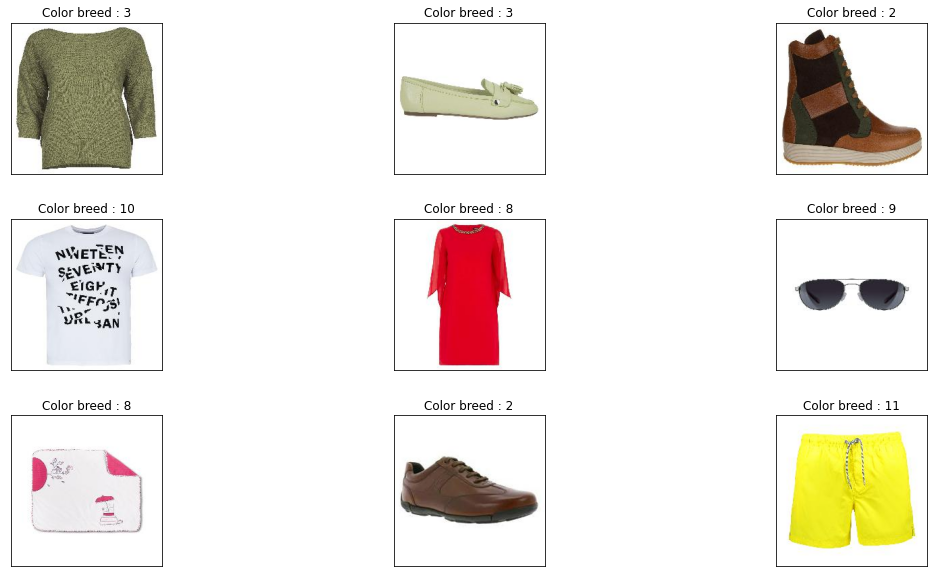

In [38]:
# Let's display some random imgs from our dataset
# to see that everything is good.

def display_rand_imgs(images, labels):
    
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Color breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

display_rand_imgs(images, labels)  

# keep in mind that ['black', 'blue', 'brown', 'green', 'grey', 
                #'orange', 'pink', 'purple', 'red', 'silver', 'white', 'yellow']

In [43]:
from keras.utils.np_utils import to_categorical
# Split dataset in train, test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = seed)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("x_train shape = ",X_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",X_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (4991, 224, 224, 3)
y_train shape =  (4991, 12)

x_test shape =  (1248, 224, 224, 3)
y_test shape =  (1248, 12)


In [ ]:
# Here we will construct our CNN Model.
# We will add Max Pooling layers and Drop Out Layers with Batch Normalization.

In [ ]:
#Chatgtp code

# Define the base model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# Define your own classification head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # num_classes is the number of categories/classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, ...)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Save the trained model
model.save('colored_clothes_model.h5')


#Convert model in Js.
tfjs.converters.save_keras_model(model, 'tfjs_model')